# **Работа с данными студента**

In [1]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# проверка каталога
!ls

sample_data


In [3]:
#удаление дубликатов
!rm 1.txt

rm: cannot remove '1.txt': No such file or directory


In [4]:
#загрузка текстов студента в среду
from google.colab import files
uploaded = files.upload()

Saving 10.txt to 10.txt


In [5]:
#объединение  текстов в один массив данных

first = True
with open('stud.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(10, 11)])
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')

filename = 'stud.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
#print(text1)

#убираем гиперсылки
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

#print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Очистка текста Lowering the case, removing punctuations and numbers

#text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('№', '') #replacing hyphens with whitespace \t «
text_clean = text_clean.replace('–', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\t', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('«', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(':', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(';', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('*', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('•', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('#', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('»', '') #replacing hyphens with whitespace —
text_clean = text_clean.replace('—', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\xa0', ' ') #replacing hyphens with whitespace

table=str.maketrans('','',string.punctuation)
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)


text_lower2=text_lower.split(' ')
text_lower2
#len(text_lower2)




LITRU.RU - Электронная Библиотека

Название книги: Насморк
Автор(ы): Лем Станислав  
Жанр: Научная фантастика
Адрес книги: http://www.litru.ru/?book=61657&description=1




---------------------------------------------


 Лем Станислав
 Насморк

 Станислав Лем 
 Насморк 
 Посвящается доктору Анджею Мадейскому 
 НЕАПОЛЬ - РИМ 
 Мне казалось, что этот последний день никогда не кончится. Не из чувства страха; я не боялся. Да и чего бояться? Я был один в разноязыкой толпе. Никто не обращал на меня внимания. Опекуны не показывались на глаза; в сущности, я даже не знал их в лицо. Я не верил, что, ложась в постель в пижаме Адамса, бреясь его бритвой и прогуливаясь его маршрутами вдоль залива, навлекаю на себя проклятие, и все же чувствовал облегчение от того, что завтра сброшу чужую личину. В дороге тоже нечего опасаться засады. Ведь на автостраде ни один волос не упал с его головы. А единственную ночь в Риме мне предстояло провести под усиленной опекой. Я говорил себе, что это - всего лишь 

['',
 'litru',
 'ru',
 '',
 'электронная',
 'библиотека',
 '',
 'название',
 'книги',
 'насморк',
 'авторы',
 'лем',
 'станислав',
 '',
 '',
 'жанр',
 'научная',
 'фантастика',
 'адрес',
 'книги',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'лем',
 'станислав',
 '',
 'насморк',
 '',
 '',
 'станислав',
 'лем',
 '',
 '',
 'насморк',
 '',
 '',
 'посвящается',
 'доктору',
 'анджею',
 'мадейскому',
 '',
 '',
 'неаполь',
 '',
 'рим',
 '',
 '',
 'мне',
 'казалось',
 'что',
 'этот',
 'последний',
 'день',
 'никогда',
 'не',
 'кончится',
 '',
 'не',
 'из',
 'чувства',
 'страха',
 'я',
 'не',
 'боялся',
 '',
 'да',
 'и',
 'чего',
 'бояться',
 'я',
 'был',
 'один',
 'в',
 'разноязыкой',
 'толпе',
 '',
 'никто',
 'не',
 'обращал',
 'на',
 'меня',
 'внимания',
 '',
 'опекуны',
 'не',
 'показывались',
 'на',
 'глаза',
 'в',
 'сущности',
 'я',
 'даже',
 'не',
 'знал',
 'их',
 'в',
 'лицо',
 '',
 'я',
 'не',
 'верил',
 'что',
 'ложась',
 'в',
 'постель',
 'в',
 'пижаме',
 'адамса',
 'бреясь',
 'его'

In [6]:
#Токенизация текста
spec_chars = string.punctuation + '\n\xa0«»\t'
text_test = " ".join([ch for ch in text_lower2 if ch not in spec_chars])
#text_test

text_tokens = word_tokenize(text_test)
#text_tokens
#from nltk import word_tokenize
#nltk.download('punkt')
#sentences = [word.lower() for word in text_lower2 if re.match('^[а-яА-ЯёЁ]+', word)]


dftt = pd.DataFrame(text_tokens, columns=['Words'])
dftt = dftt.dropna(subset=['Words'])
#dftt
sentences=dftt['Words'].values.tolist()
text_tokens

['litru',
 'ru',
 'электронная',
 'библиотека',
 'название',
 'книги',
 'насморк',
 'авторы',
 'лем',
 'станислав',
 'жанр',
 'научная',
 'фантастика',
 'адрес',
 'книги',
 'лем',
 'станислав',
 'насморк',
 'станислав',
 'лем',
 'насморк',
 'посвящается',
 'доктору',
 'анджею',
 'мадейскому',
 'неаполь',
 'рим',
 'мне',
 'казалось',
 'что',
 'этот',
 'последний',
 'день',
 'никогда',
 'не',
 'кончится',
 'не',
 'из',
 'чувства',
 'страха',
 'я',
 'не',
 'боялся',
 'да',
 'и',
 'чего',
 'бояться',
 'я',
 'был',
 'один',
 'в',
 'разноязыкой',
 'толпе',
 'никто',
 'не',
 'обращал',
 'на',
 'меня',
 'внимания',
 'опекуны',
 'не',
 'показывались',
 'на',
 'глаза',
 'в',
 'сущности',
 'я',
 'даже',
 'не',
 'знал',
 'их',
 'в',
 'лицо',
 'я',
 'не',
 'верил',
 'что',
 'ложась',
 'в',
 'постель',
 'в',
 'пижаме',
 'адамса',
 'бреясь',
 'его',
 'бритвой',
 'и',
 'прогуливаясь',
 'его',
 'маршрутами',
 'вдоль',
 'залива',
 'навлекаю',
 'на',
 'себя',
 'проклятие',
 'и',
 'все',
 'же',
 'чувствов

In [7]:
from google.colab import files
with pd.ExcelWriter('allstudentWords.xlsx') as writer:
    dftt.to_excel(writer, sheet_name='stud')
files.download('allstudentWords.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Лемматизация данных

In [8]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=30328aa7abb43417f21404357e455dc7e134db73d84c7debf6606e9da0f3c031
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [9]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = sentences
normal_text=[]
for word in words:
    p = morph.parse(word)[0]
    normal_text.append(p.normal_form)
    #print(p.normal_form)
normal_text

['litru',
 'ru',
 'электронный',
 'библиотека',
 'название',
 'книга',
 'насморк',
 'автор',
 'лем',
 'станислав',
 'жанр',
 'научный',
 'фантастика',
 'адрес',
 'книга',
 'лем',
 'станислав',
 'насморк',
 'станислав',
 'лем',
 'насморк',
 'посвящаться',
 'доктор',
 'анджей',
 'мадейский',
 'неаполь',
 'рим',
 'я',
 'казаться',
 'что',
 'этот',
 'последний',
 'день',
 'никогда',
 'не',
 'кончиться',
 'не',
 'из',
 'чувство',
 'страх',
 'я',
 'не',
 'бояться',
 'да',
 'и',
 'что',
 'бояться',
 'я',
 'быть',
 'один',
 'в',
 'разноязыкий',
 'толпа',
 'никто',
 'не',
 'обращать',
 'на',
 'я',
 'внимание',
 'опекун',
 'не',
 'показываться',
 'на',
 'глаз',
 'в',
 'сущность',
 'я',
 'даже',
 'не',
 'знать',
 'они',
 'в',
 'лицо',
 'я',
 'не',
 'верить',
 'что',
 'ложиться',
 'в',
 'постель',
 'в',
 'пижама',
 'адамс',
 'бриться',
 'он',
 'бритва',
 'и',
 'прогуливаться',
 'он',
 'маршрут',
 'вдоль',
 'залив',
 'навлекать',
 'на',
 'себя',
 'проклятие',
 'и',
 'всё',
 'же',
 'чувствовать',
 '

In [10]:
#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in normal_text if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

# Подготовка данных к частотной токенизации, разбиение данных на равное количество символов

Mapping words from first 5000 lines using mapper 1 in list 1

In [11]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [12]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [13]:
print(list1)

[('litru', 1), ('электронный', 1), ('библиотека', 1), ('название', 1), ('книга', 1), ('насморк', 1), ('автор', 1), ('лем', 1), ('станислав', 1), ('жанр', 1), ('научный', 1), ('фантастика', 1), ('адрес', 1), ('книга', 1), ('лем', 1), ('станислав', 1), ('насморк', 1), ('станислав', 1), ('лем', 1), ('насморк', 1), ('посвящаться', 1), ('доктор', 1), ('анджей', 1), ('мадейский', 1), ('неаполь', 1), ('рим', 1), ('казаться', 1), ('что', 1), ('этот', 1), ('последний', 1), ('день', 1), ('никогда', 1), ('кончиться', 1), ('чувство', 1), ('страх', 1), ('бояться', 1), ('что', 1), ('бояться', 1), ('быть', 1), ('один', 1), ('разноязыкий', 1), ('толпа', 1), ('никто', 1), ('обращать', 1), ('внимание', 1), ('опекун', 1), ('показываться', 1), ('глаз', 1), ('сущность', 1), ('даже', 1), ('знать', 1), ('они', 1), ('лицо', 1), ('верить', 1), ('что', 1), ('ложиться', 1), ('постель', 1), ('пижама', 1), ('адамс', 1), ('бриться', 1), ('бритва', 1), ('прогуливаться', 1), ('маршрут', 1), ('вдоль', 1), ('залив', 1)

In [14]:
print(list2)

[('ть', 1), ('выхлопной', 1), ('газ', 1), ('прийтись', 1), ('выключить', 1), ('машина', 1), ('итальянский', 1), ('манер', 1), ('налезать', 1), ('друг', 1), ('друг', 1), ('объезд', 1), ('зеркальце', 1), ('капот', 1), ('крыша', 1), ('potente', 1), ('benzina', 1), ('italiana', 1), ('могучий', 1), ('итальянский', 1), ('бензин', 1), ('итал', 1), ('угарный', 1), ('вонять', 1), ('тащиться', 1), ('автобус', 1), ('смрадный', 1), ('облако', 1), ('выхлопной', 1), ('газ', 1), ('через', 1), ('задний', 1), ('стекло', 1), ('автобус', 1), ('глазеть', 1), ('ребёнок', 1), ('одинаковый', 1), ('зелёный', 1), ('шапочка', 1), ('желудок', 1), ('быть', 1), ('макароны', 1), ('голова', 1), ('жар', 1), ('сердце', 1), ('датчик', 1), ('который', 1), ('цепляться', 1), ('через', 1), ('рубашка', 1), ('подтяжка', 1), ('при', 1), ('каждый', 1), ('поворот', 1), ('руль', 1), ('разорвать', 1), ('пакет', 1), ('бумажный', 1), ('носов', 1), ('платок', 1), ('разложить', 1), ('они', 1), ('около', 1), ('рычаг', 1), ('передача',

Merging the two lists

In [15]:
final_list = list1+list2

# Sorting

Sorting the list alphabetically in ascending order

In [16]:
final_list.sort()

In [17]:
len(final_list)

33400

In [18]:
final_list[0]

('americano', 1)

In [19]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [21]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [22]:
len(map1)

33399

In [23]:
len(map2)

0

In [24]:
print(map1)

[('area', 1), ('aurorae', 1), ('austronauta', 1), ('aut', 1), ('aut', 1), ('aut', 1), ('aut', 1), ('benzina', 1), ('bien', 1), ('bosporus', 1), ('caesar', 1), ('caesar', 1), ('ceti', 1), ('ceti', 1), ('cns', 1), ('corriger', 1), ('cui', 1), ('cui', 1), ('day', 1), ('day', 1), ('del', 1), ('del', 1), ('deux', 1), ('esprit', 1), ('esprit', 1), ('excellence', 1), ('fecit', 1), ('folie', 1), ('fortune', 1), ('gematus', 1), ('handicap', 1), ('have', 1), ('hoc', 1), ('interim', 1), ('italiana', 1), ('lescalier', 1), ('lescalier', 1), ('liberation', 1), ('litru', 1), ('mal', 1), ('moeurs', 1), ('nausea', 1), ('nice', 1), ('nice', 1), ('nihil', 1), ('nihil', 1), ('par', 1), ('per', 1), ('petit', 1), ('potente', 1), ('presto', 1), ('presto', 1), ('procura', 1), ('prodest', 1), ('prodest', 1), ('roma', 1), ('servizio', 1), ('sinus', 1), ('sole', 1), ('sole', 1), ('tiberina', 1), ('womens', 1), ('xix', 1), ('xviii', 1), ('xviii', 1), ('абонемент', 1), ('абонемент', 1), ('абонемент', 1), ('абонеме

In [25]:
print(map2)

[]


# Reducer

Defining the reducer function

In [26]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [27]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [28]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [29]:
list3 = reduce1(map1)

Reducing the second n-z list

In [30]:
list4 = reduce2(map2)

Merging the two reduced lists

In [31]:
answer_list = list3 + list4
print(answer_list)

[('area', 1), ('aurorae', 1), ('austronauta', 1), ('aut', 4), ('benzina', 1), ('bien', 1), ('bosporus', 1), ('caesar', 2), ('ceti', 2), ('cns', 1), ('corriger', 1), ('cui', 2), ('day', 2), ('del', 2), ('deux', 1), ('esprit', 2), ('excellence', 1), ('fecit', 1), ('folie', 1), ('fortune', 1), ('gematus', 1), ('handicap', 1), ('have', 1), ('hoc', 1), ('interim', 1), ('italiana', 1), ('lescalier', 2), ('liberation', 1), ('litru', 1), ('mal', 1), ('moeurs', 1), ('nausea', 1), ('nice', 2), ('nihil', 2), ('par', 1), ('per', 1), ('petit', 1), ('potente', 1), ('presto', 2), ('procura', 1), ('prodest', 2), ('roma', 1), ('servizio', 1), ('sinus', 1), ('sole', 2), ('tiberina', 1), ('womens', 1), ('xix', 1), ('xviii', 2), ('абонемент', 5), ('абсолютно', 5), ('абсолютный', 2), ('абсурдно', 1), ('абсурдный', 1), ('авантюра', 1), ('авария', 7), ('авиалиния', 2), ('авис', 2), ('австралийский', 1), ('австриец', 6), ('австрийский', 1), ('автобус', 2), ('автограф', 1), ('автоколяска', 1), ('автоконструкто

# Final Dataframe

In [32]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

,Word,Frequency
0,area,1
1,aurorae,1
2,austronauta,1
3,aut,4
4,benzina,1
...,...,...
7971,ячейка,1
7972,ящерица,1
7973,ящик,2
7974,ящичек,2


In [34]:
print(df.to_string())

                         Word  Frequency
0                        area          1
1                     aurorae          1
2                 austronauta          1
3                         aut          4
4                     benzina          1
5                        bien          1
6                    bosporus          1
7                      caesar          2
8                        ceti          2
9                         cns          1
10                   corriger          1
11                        cui          2
12                        day          2
13                        del          2
14                       deux          1
15                     esprit          2
16                 excellence          1
17                      fecit          1
18                      folie          1
19                    fortune          1
20                    gematus          1
21                   handicap          1
22                       have          1
23              

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       7976 non-null   object
 1   Frequency  7976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.8+ KB


In [36]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

,Word,Frequency
7731,что,682
497,быть,535
7933,это,463
3894,они,316
2281,как,298
...,...,...
3499,неописуемый,1
3498,неоновый,1
3497,неоккупированный,1
3493,необычно,1


# EN

In [42]:
!rm stop-words_en.xlsx

rm: cannot remove 'stop-words_en.xlsx': No such file or directory


In [43]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words_en.xlsx to stop-words_en.xlsx


In [44]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

Unnamed: 0    179
0             179
dtype: int64


In [45]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.count())
#убираем слова-стоп
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.stop_en)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_11'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)


#df2=df1[df1['Word'].map(len) > 3]

Unnamed: 0    179
stop_en       179
dtype: int64
     WordStudent_11  Frequency
0               что        682
1              быть        535
2               это        463
3               они        316
4               как        298
...             ...        ...
7970        совесть          1
7971      совещание          1
7972    соглашаться          1
7973    сознательно          1
7974         ёкнуть          1

[7975 rows x 2 columns]
WordStudent_11    7975
Frequency         7975
dtype: int64


# RU

In [37]:
from google.colab import files
uploaded = files.upload()

Saving stop-words-ru.xlsx to stop-words-ru.xlsx


In [46]:
df_stop= pd.read_excel("stop-words-ru.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_ru'}, inplace=True)
print(df_stop.count())

Unnamed: 0    151
stop_ru       151
dtype: int64


In [47]:
df_student=df_student_clear2
# df_student_clear=df_student[~df_student.WordStudent_5.isin(df_stop.stop_ru)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_1'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

     WordStudent_11  Frequency
0               что        682
1              быть        535
2               это        463
3               они        316
4               как        298
...             ...        ...
7970        совесть          1
7971      совещание          1
7972    соглашаться          1
7973    сознательно          1
7974         ёкнуть          1

[7975 rows x 2 columns]
WordStudent_11    7975
Frequency         7975
dtype: int64


# PLOT

<ipython-input-48-c2de94caeb8c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_11'],rotation=75)


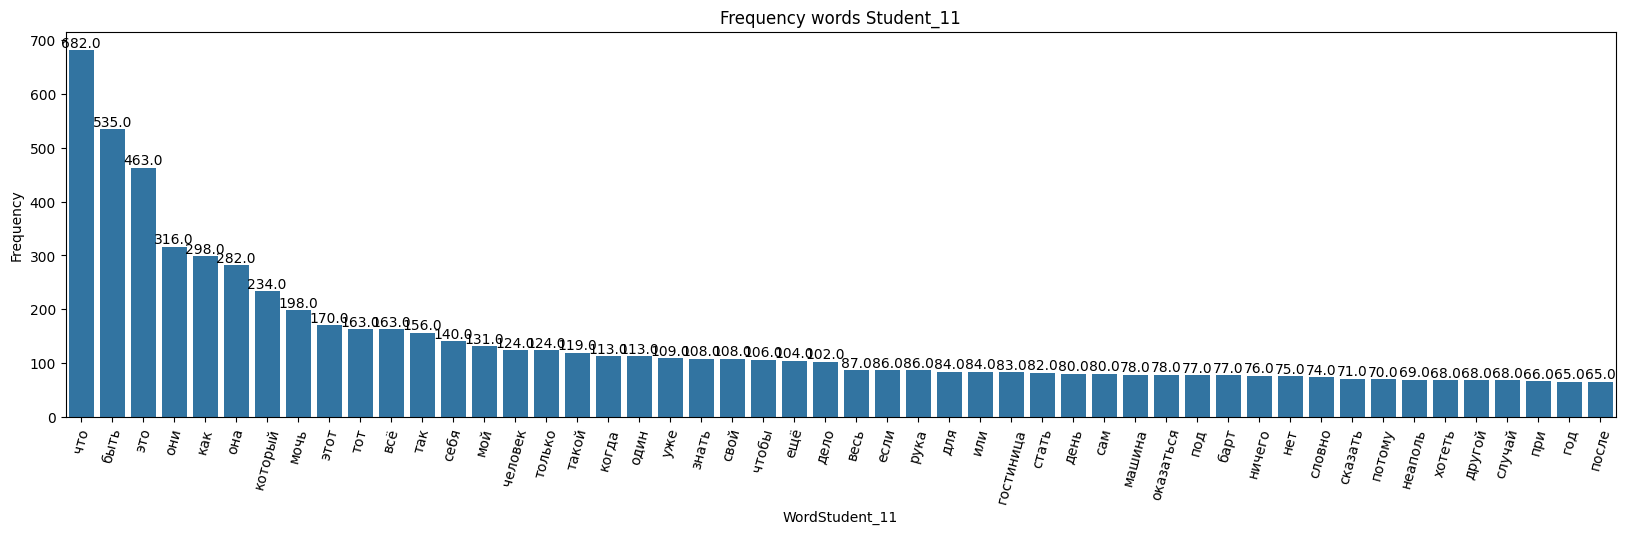

In [48]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_11',y='Frequency',data=df_student_clear2.head(50))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_11'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_11")
#setting the Y-axis labels
ax.set_ylabel("Frequency")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [49]:
from google.colab import files
with pd.ExcelWriter('outputStudents.xlsx') as writer:
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_11')
files.download('outputStudents.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
!ls

10.txt		      outputStudents.xlsx  stop-words_en.xlsx  stud.txt
allstudentWords.xlsx  sample_data	   stop-words-ru.xlsx


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [51]:
!rm Analise_Осокин.xlsx

rm: cannot remove 'Analise_Осокин.xlsx': No such file or directory


In [52]:
from google.colab import files
uploaded = files.upload()

Saving outputTeacherW_Reduce.xlsx to outputTeacherW_Reduce.xlsx


In [53]:
df_teach = pd.read_excel("outputTeacherW_Reduce.xlsx", 'TeacerWords')
# df_teach
# print(df_teach)
print(df_teach.count())

Unnamed: 0       7787
KorpusBosenko    7787
Frequency        7787
dtype: int64


In [54]:
df_stud = pd.read_excel("outputStudents.xlsx", 'outputStudent_11')
#print(df_stud)
print(df_stud.count())

Unnamed: 0        7975
WordStudent_11    7975
Frequency         7975
dtype: int64


In [55]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_11.isin(df_teach.KorpusBosenko)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_11':'WordSt_11Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_11'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

      Unnamed: 0 WordSt_11Tch  FrSt_11
0           7974       ёкнуть        1
1           2684       ящичек        2
2           2697         ящик        2
3           5912      ящерица        1
4           5911       ячейка        1
...          ...          ...      ...
7726        4781    абсурдный        1
7727        4782     абсурдно        1
7728        2693   абсолютный        2
7729        1336    абсолютно        5
7730        1355    абонемент        5

[7731 rows x 3 columns]
Unnamed: 0      7731
WordSt_11Tch    7731
FrSt_11         7731
dtype: int64


In [56]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusBosenko.isin(df_stud.WordStudent_11)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusBosenko':'WordSt_11Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

      Unnamed: 0 WordSt_11Tch  FrTch
0           7786       ёкнуть      1
1           3293       ящичек      2
2           3295         ящик      2
3           7303      ящерица      1
4           7302       ячейка      1
...          ...          ...    ...
7726        7301    абсурдный      1
7727        7304     абсурдно      1
7728        2811   абсолютный      2
7729        1137    абсолютно      5
7730        1473    абонемент      4

[7731 rows x 3 columns]
Unnamed: 0      7731
WordSt_11Tch    7731
FrTch           7731
dtype: int64


In [57]:
df_teach_ok_1=df_teach_ok
df_teach_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_teach_ok_1

,WordSt_11Tch,FrTch
0,это,463
1,который,234
2,мочь,198
3,всё,173
4,человек,124
...,...,...
7726,арестовать,1
7727,арест,1
7728,арендовать,1
7729,аргументация,1


In [58]:
df_student_ok_1=df_student_ok
df_student_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_student_ok_1

,WordSt_11Tch,FrSt_11
0,это,463
1,который,234
2,мочь,198
3,всё,163
4,человек,124
...,...,...
7726,совесть,1
7727,совещание,1
7728,соглашаться,1
7729,сознательно,1


In [59]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res

,WordSt_11Tch,FrTch,FrSt_11
0,это,463,463
1,который,234,234
2,мочь,198,198
3,всё,173,163
4,человек,124,124
...,...,...,...
7726,арестовать,1,1
7727,арест,1,1
7728,арендовать,1,1
7729,аргументация,1,1


In [60]:
#Объединяем частоты студента и преподавателя
res = df_student_ok.merge(df_teach_ok)
res

,WordSt_11Tch,FrSt_11,FrTch
0,это,463,463
1,который,234,234
2,мочь,198,198
3,всё,163,173
4,человек,124,124
...,...,...,...
7726,совесть,1,1
7727,совещание,1,1
7728,соглашаться,1,1
7729,сознательно,1,1


In [61]:
from google.colab import files
with pd.ExcelWriter('rezult.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
x=res['WordSt_11Tch'].values.tolist()

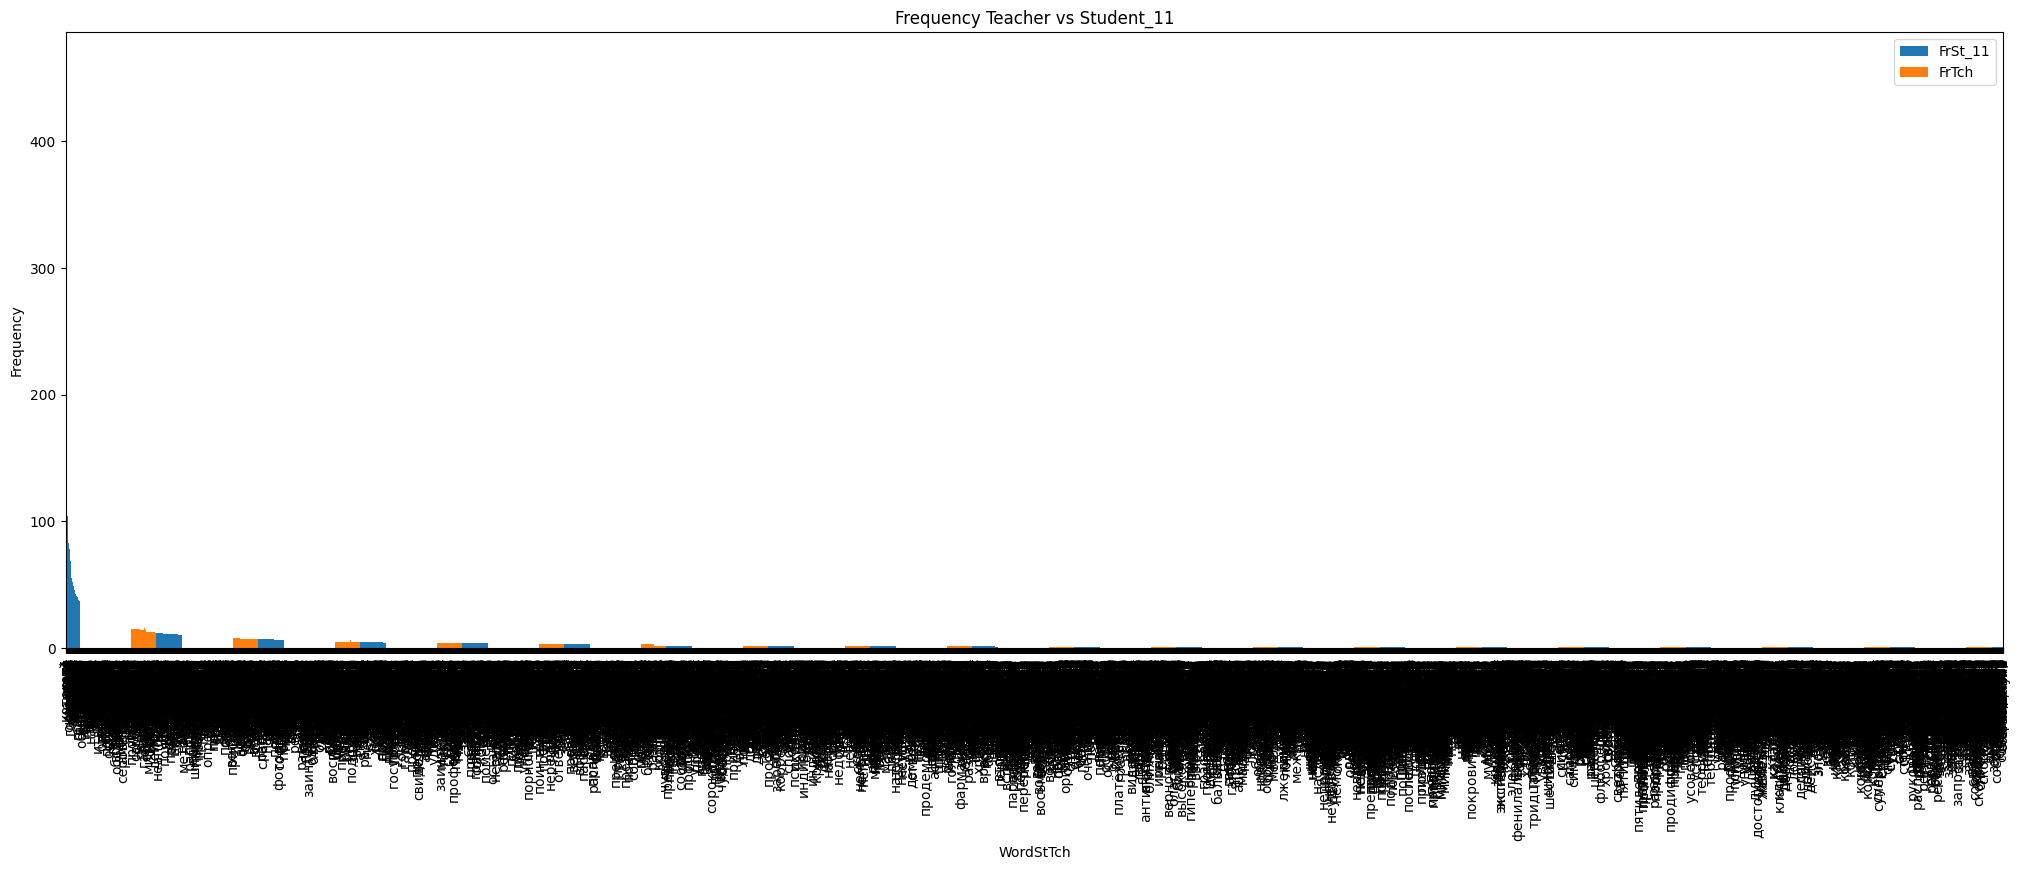

In [63]:
res.plot(kind='bar', figsize=(25,8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Frequency Teacher vs Student_11")
plt.xticks(x_pos, x)
plt.show()

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

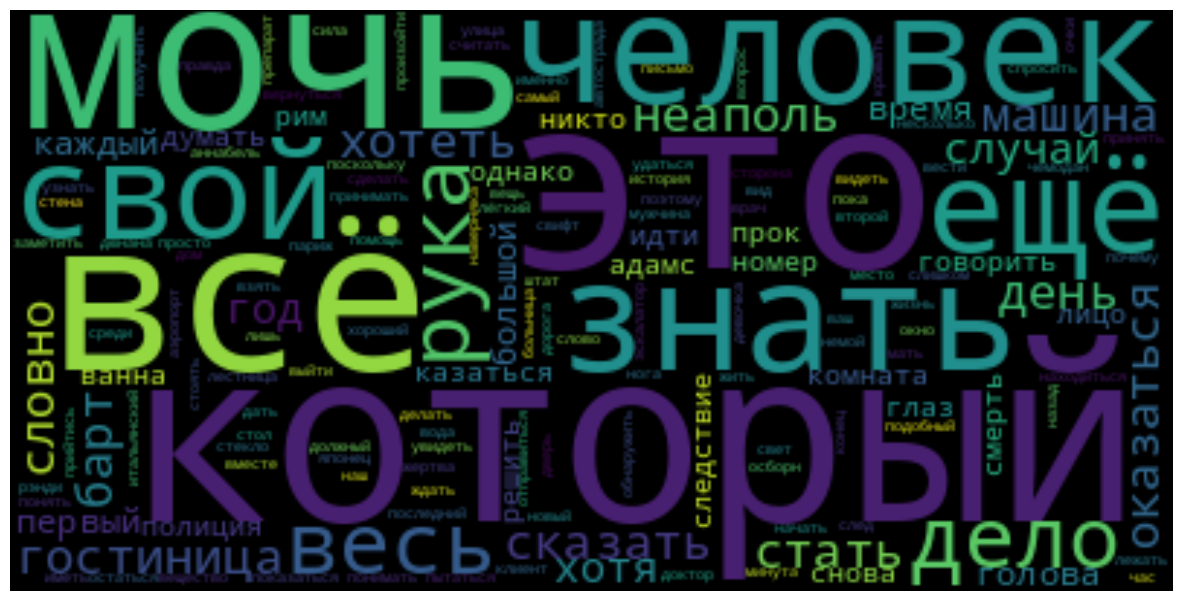

In [66]:
viz=res['WordSt_11Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")